# Linear Regression Analysis

## Trevor Nguyen

# Pre-Processing

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# Load the dataset
concrete = pd.read_csv("https://raw.githubusercontent.com/trevortnguyen/Assignment1-LinearRegressionAnalysis/main/slump_test.csv")

In [ ]:
# Display the first 5 rows to get an overview of the data
concrete.head()

,Unnamed: 0,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
# Check to see if the number of instances and features matches what is displayed on the UCI ML Repository
concrete.shape

(103, 12)

In [ ]:
# The number of features doesn't match, so let's remove the first and second columns as they both are index columns
concrete.drop(["Unnamed: 0", "No"], axis = 1, inplace = True)

In [ ]:
concrete.shape

(103, 10)

In [ ]:
concrete.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
# Rename the columns
concrete = concrete.rename(columns = {"Fly ash": "Fly Ash", "SLUMP(cm)": "Slump", "FLOW(cm)": "Flow", "Compressive Strength (28-day)(Mpa)": "Strength"})

In [ ]:
concrete.isna().sum()

Cement          0
Slag            0
Fly Ash         0
Water           0
SP              0
Coarse Aggr.    0
Fine Aggr.      0
Slump           0
Flow            0
Strength        0
dtype: int64

In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cement        103 non-null    float64
 1   Slag          103 non-null    float64
 2   Fly Ash       103 non-null    float64
 3   Water         103 non-null    float64
 4   SP            103 non-null    float64
 5   Coarse Aggr.  103 non-null    float64
 6   Fine Aggr.    103 non-null    float64
 7   Slump         103 non-null    float64
 8   Flow          103 non-null    float64
 9   Strength      103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [ ]:
# Examine the attributes
concrete.describe()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.,Slump,Flow,Strength
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [ ]:
concrete_attributes = concrete.drop(["Slump", "Flow", "Strength"], axis = 1)
concrete_target = concrete[["Strength"]]

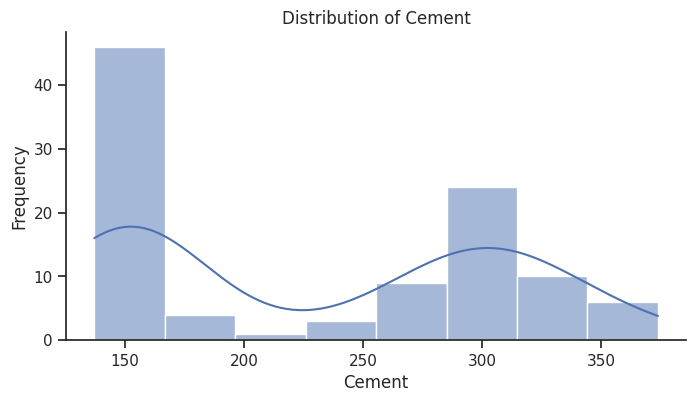

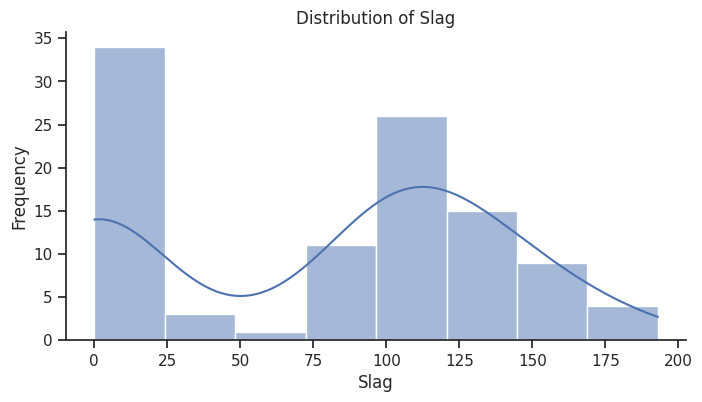

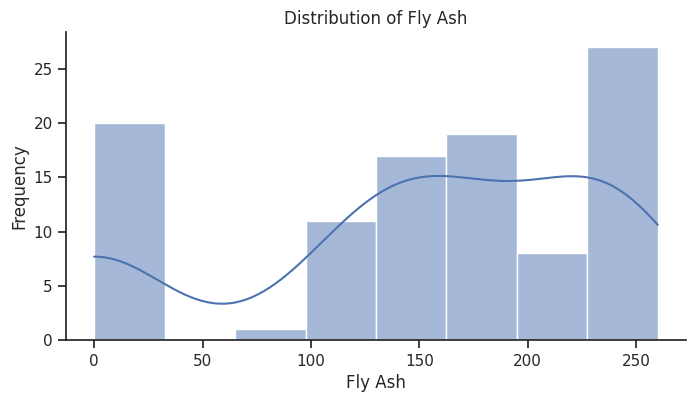

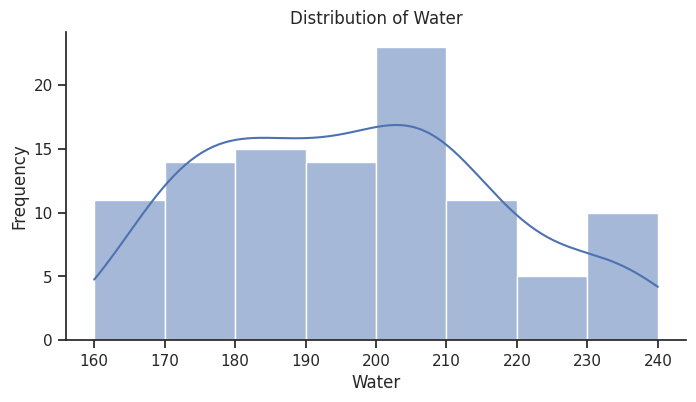

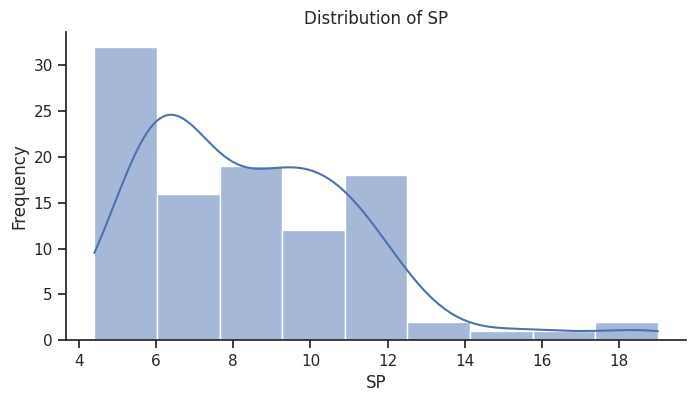

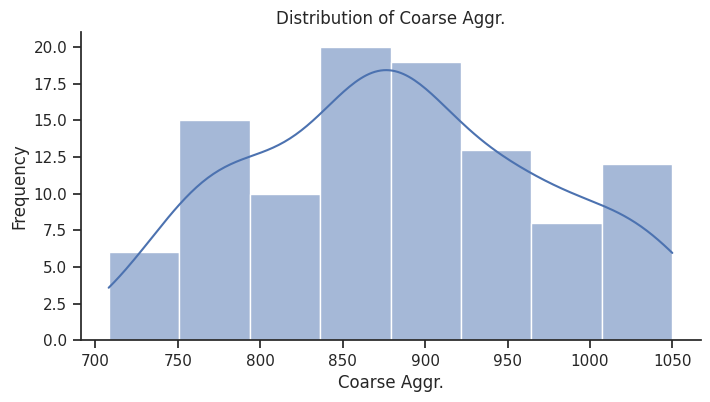

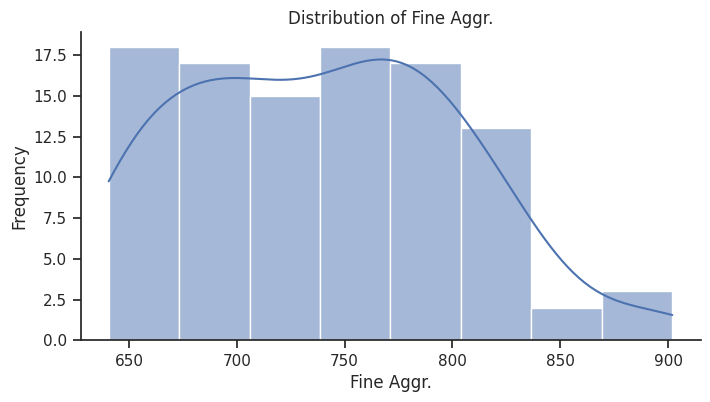

In [ ]:
# Check if the attributes are normally distributed
for column in concrete_attributes.columns:
  sns.set(style = "ticks")
  plt.figure(figsize = (8, 4))
  sns.histplot(data = concrete_attributes[column], kde = True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  sns.despine()
  plt.show()

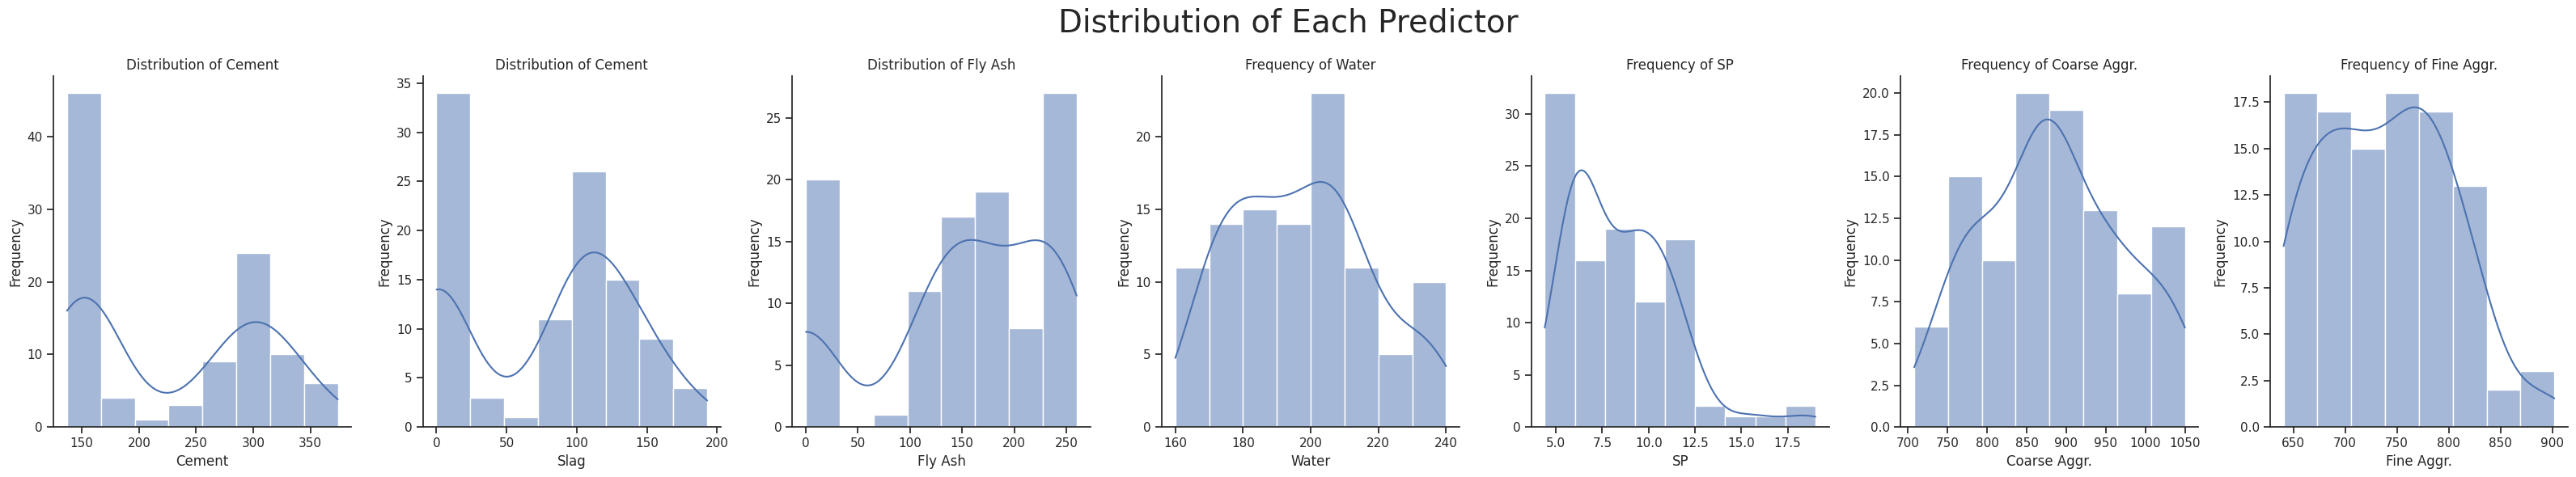

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (32, 6))

fig.suptitle('Distribution of Each Predictor', fontsize = 28)

sns.histplot(data = concrete_attributes["Cement"], kde = True, ax = axes[0])
axes[0].set_xlabel('Cement')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Cement')

sns.histplot(data = concrete_attributes["Slag"], kde = True, ax = axes[1])
axes[1].set_xlabel('Slag')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Cement')

sns.histplot(data = concrete_attributes["Fly Ash"], kde = True, ax = axes[2])
axes[2].set_xlabel('Fly Ash')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Fly Ash')

sns.histplot(data = concrete_attributes["Water"], kde = True, ax = axes[3])
axes[3].set_xlabel('Water')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Water')

sns.histplot(data = concrete_attributes["SP"], kde = True, ax = axes[4])
axes[4].set_xlabel('SP')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of SP')

sns.histplot(data = concrete_attributes["Coarse Aggr."], kde = True, ax = axes[5])
axes[5].set_xlabel('Coarse Aggr.')
axes[5].set_ylabel('Frequency')
axes[5].set_title('Frequency of Coarse Aggr.')

sns.histplot(data = concrete_attributes["Fine Aggr."], kde = True, ax = axes[6])
axes[6].set_xlabel('Fine Aggr.')
axes[6].set_ylabel('Frequency')
axes[6].set_title('Frequency of Fine Aggr.')

sns.despine()
plt.tight_layout()

In [ ]:
# Standardize the attributes
standardize_scaler = StandardScaler()

standardized_data = standardize_scaler.fit_transform(concrete_attributes)

concrete_standardized = pd.DataFrame(data = standardized_data, columns = concrete_attributes.columns)

In [ ]:
concrete_standardized.describe()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.
count,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02
mean,7.760782e-17,1.983311e-16,-6.251741e-17,-1.847497e-15,1.471315e-16,3.332825e-15,-3.347376e-15
std,1.004890e+00,1.004890e+00,1.004890e+00,1.004890e+00,1.004890e+00,1.004890e+00,1.004890e+00
min,-1.183465e+00,-1.295953e+00,-1.753063e+00,-1.848249e+00,-1.481747e+00,-2.000638e+00,-1.570661e+00
25%,-9.923660e-01,-1.295122e+00,-3.942778e-01,-8.537103e-01,-9.090644e-01,-7.330345e-01,-8.742101e-01
50%,2.306669e-01,3.660837e-01,1.762942e-01,-5.807914e-02,-1.932109e-01,-5.660038e-02,4.910289e-02
75%,9.428287e-01,7.815929e-01,1.022741e+00,6.132346e-01,5.226426e-01,7.824053e-01,7.677640e-01
max,1.835897e+00,1.911778e+00,1.305674e+00,2.129907e+00,3.743983e+00,1.886300e+00,2.576315e+00


In [ ]:
# Check if the attributes have a mean of 0
concrete_standardized.mean()

Cement          7.760782e-17
Slag            1.983311e-16
Fly Ash        -6.251741e-17
Water          -1.847497e-15
SP              1.471315e-16
Coarse Aggr.    3.332825e-15
Fine Aggr.     -3.347376e-15
dtype: float64

In [ ]:
for column in concrete_standardized.columns:
  column_mean = concrete_standardized[column].mean()
  print(f"Mean of {column}: {column_mean}")

Mean of Cement: 7.760782308059347e-17
Mean of Slag: 1.9833110342818331e-16
Mean of Fly Ash: -6.251741303714473e-17
Mean of Water: -1.8474973438907943e-15
Mean of SP: 1.4713149792362512e-16
Mean of Coarse Aggr.: 3.3328248467388193e-15
Mean of Fine Aggr.: -3.3473763135664305e-15


In [ ]:
# Check if the attributes have a variance of 1
concrete_standardized.var()

Cement          1.009804
Slag            1.009804
Fly Ash         1.009804
Water           1.009804
SP              1.009804
Coarse Aggr.    1.009804
Fine Aggr.      1.009804
dtype: float64

In [ ]:
for column in concrete_standardized.columns:
  column_variance = concrete_standardized[column].var()
  print(f"Variance of {column}: {column_variance}")

Variance of Cement: 1.0098039215686276
Variance of Slag: 1.0098039215686274
Variance of Fly Ash: 1.0098039215686276
Variance of Water: 1.0098039215686274
Variance of SP: 1.0098039215686274
Variance of Coarse Aggr.: 1.0098039215686276
Variance of Fine Aggr.: 1.0098039215686276


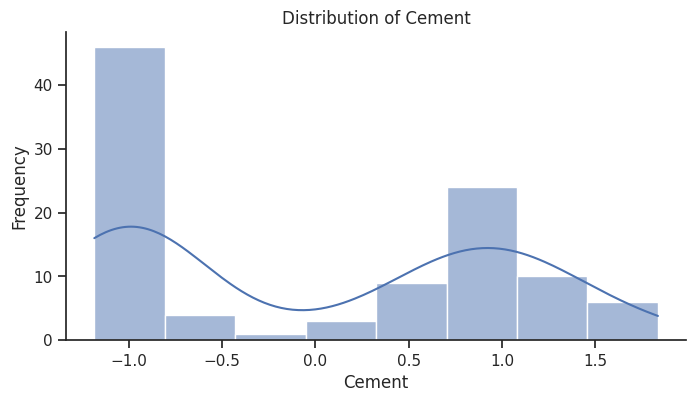

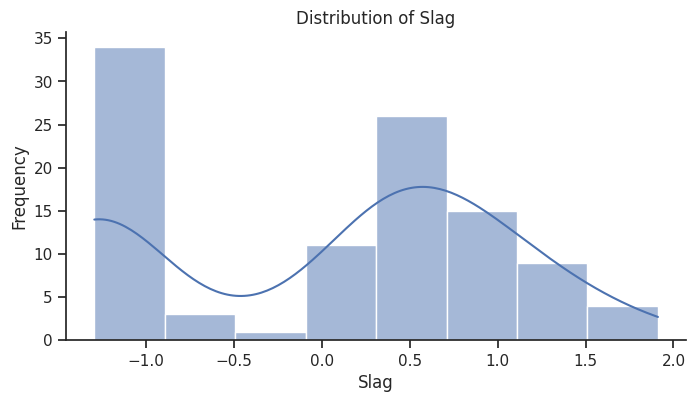

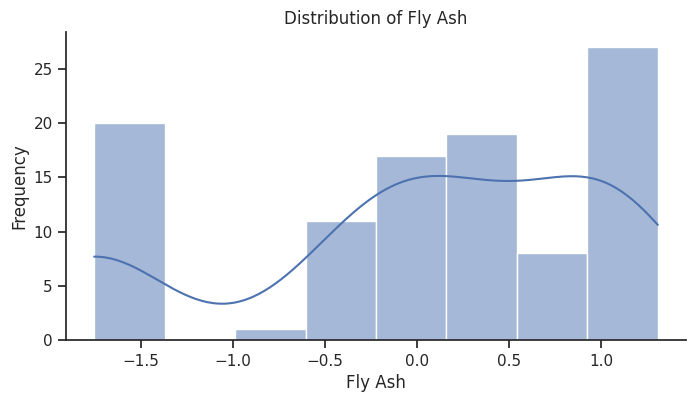

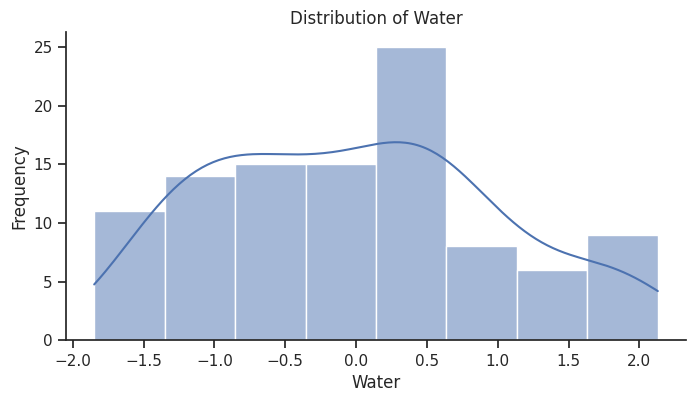

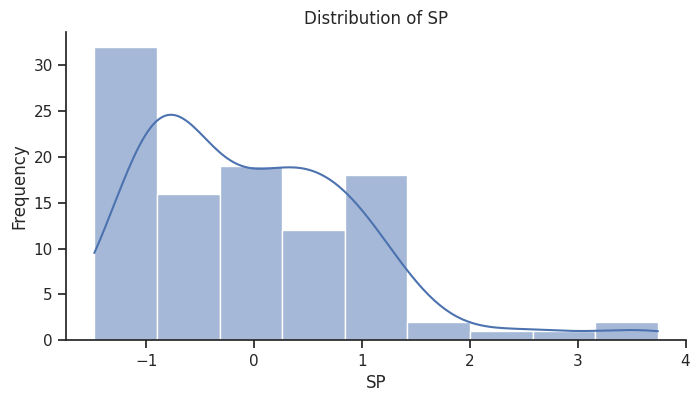

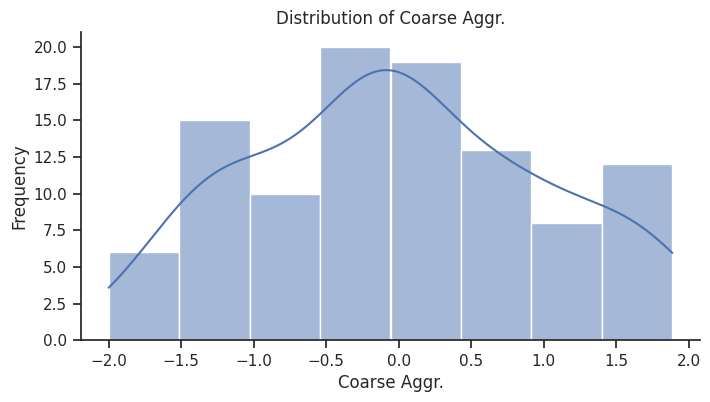

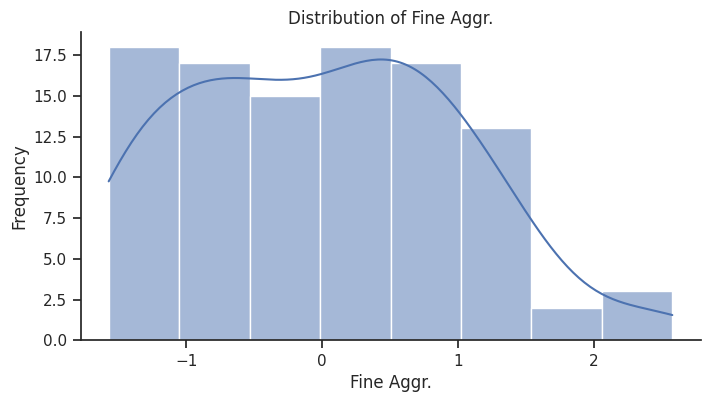

In [ ]:
for column in concrete_standardized.columns:
  sns.set(style = "ticks")
  plt.figure(figsize = (8, 4))
  sns.histplot(data = concrete_standardized[column], kde = True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  sns.despine()
  plt.show()

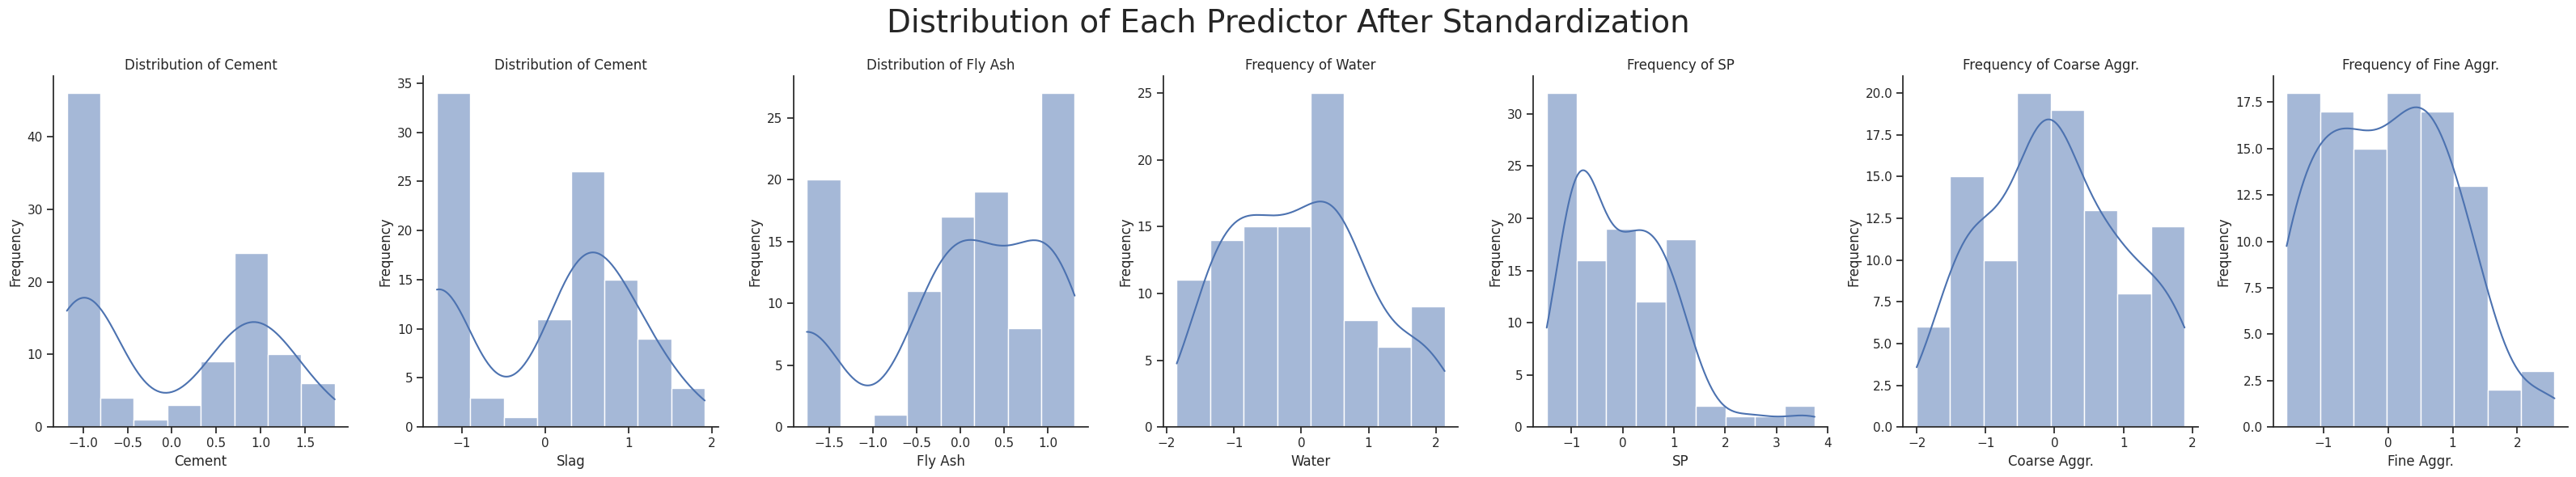

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (32, 6))

fig.suptitle('Distribution of Each Predictor After Standardization', fontsize = 28)

sns.histplot(data = concrete_standardized["Cement"], kde = True, ax = axes[0])
axes[0].set_xlabel('Cement')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Cement')

sns.histplot(data = concrete_standardized["Slag"], kde = True, ax = axes[1])
axes[1].set_xlabel('Slag')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Cement')

sns.histplot(data = concrete_standardized["Fly Ash"], kde = True, ax = axes[2])
axes[2].set_xlabel('Fly Ash')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Fly Ash')

sns.histplot(data = concrete_standardized["Water"], kde = True, ax = axes[3])
axes[3].set_xlabel('Water')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Water')

sns.histplot(data = concrete_standardized["SP"], kde = True, ax = axes[4])
axes[4].set_xlabel('SP')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of SP')

sns.histplot(data = concrete_standardized["Coarse Aggr."], kde = True, ax = axes[5])
axes[5].set_xlabel('Coarse Aggr.')
axes[5].set_ylabel('Frequency')
axes[5].set_title('Frequency of Coarse Aggr.')

sns.histplot(data = concrete_standardized["Fine Aggr."], kde = True, ax = axes[6])
axes[6].set_xlabel('Fine Aggr.')
axes[6].set_ylabel('Frequency')
axes[6].set_title('Frequency of Fine Aggr.')

sns.despine()
plt.tight_layout()

In [ ]:
# Normalize the attributes
normalize_scaler = MinMaxScaler()

normalized_data = normalize_scaler.fit_transform(concrete_standardized)

concrete_transformed = pd.DataFrame(data = normalized_data, columns = concrete_attributes.columns)

In [ ]:
concrete_transformed.describe()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.391959,0.404009,0.573133,0.464600,0.283548,0.514708,0.378748
std,0.332815,0.313271,0.328531,0.252602,0.192297,0.258530,0.242319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063291,0.000259,0.444231,0.250000,0.109589,0.326119,0.167942
50%,0.468354,0.518135,0.630769,0.450000,0.246575,0.500146,0.390589
75%,0.704219,0.647668,0.907500,0.618750,0.383562,0.715999,0.563887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
concrete_transformed.min()

Cement          0.0
Slag            0.0
Fly Ash         0.0
Water           0.0
SP              0.0
Coarse Aggr.    0.0
Fine Aggr.      0.0
dtype: float64

In [ ]:
for column in concrete_transformed.columns:
  column_min = concrete_transformed[column].min()
  print(f"Minimum of {column}: {column_min}")

Minimum of Cement: 0.0
Minimum of Slag: 0.0
Minimum of Fly Ash: 0.0
Minimum of Water: 0.0
Minimum of SP: 0.0
Minimum of Coarse Aggr.: 0.0
Minimum of Fine Aggr.: 0.0


In [ ]:
concrete_transformed.max()

Cement          1.0
Slag            1.0
Fly Ash         1.0
Water           1.0
SP              1.0
Coarse Aggr.    1.0
Fine Aggr.      1.0
dtype: float64

In [ ]:
for column in concrete_transformed.columns:
  column_max = concrete_transformed[column].max()
  print(f"Maximum of {column}: {column_max}")

Maximum of Cement: 1.0
Maximum of Slag: 1.0
Maximum of Fly Ash: 1.0
Maximum of Water: 0.9999999999999999
Maximum of SP: 1.0
Maximum of Coarse Aggr.: 1.0
Maximum of Fine Aggr.: 1.0


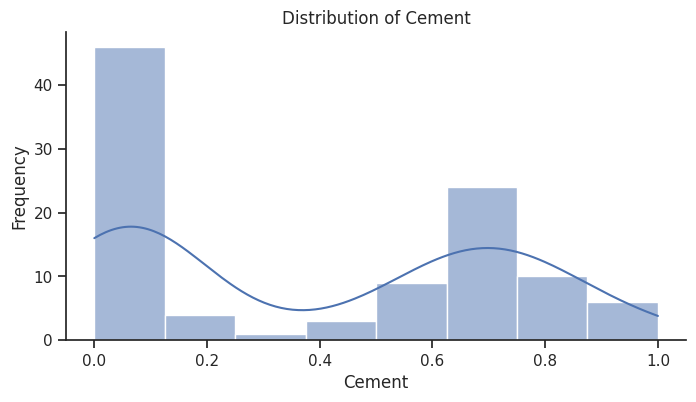

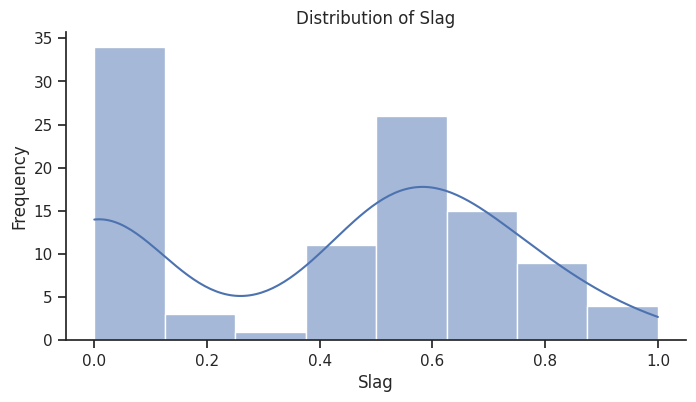

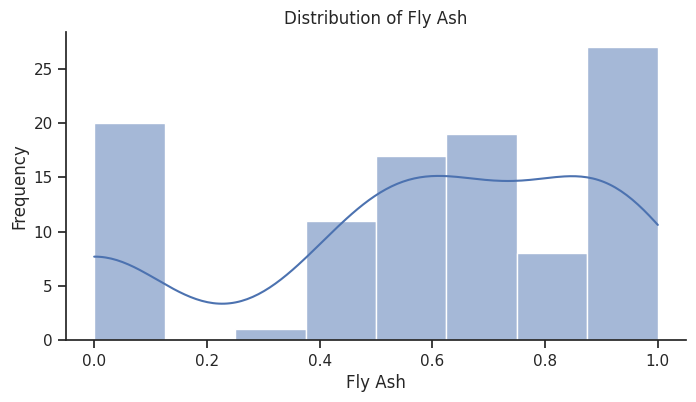

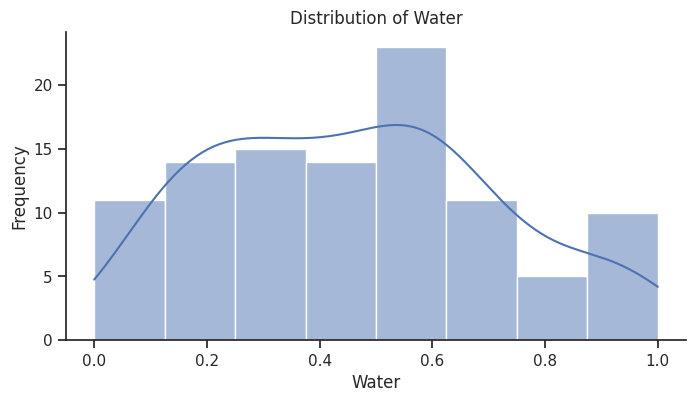

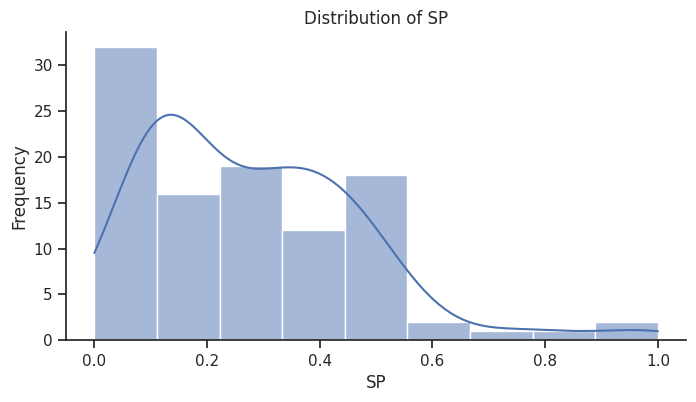

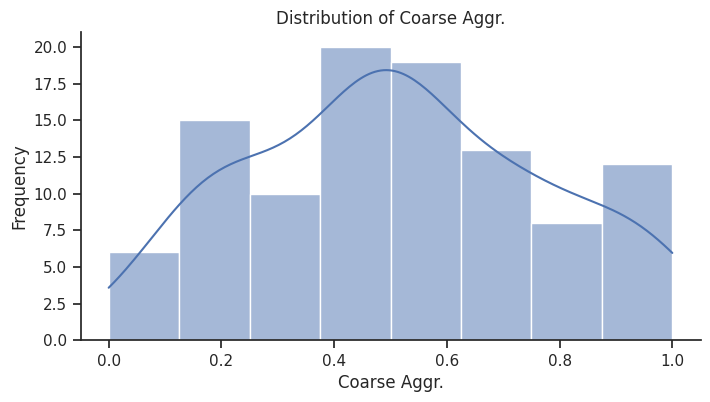

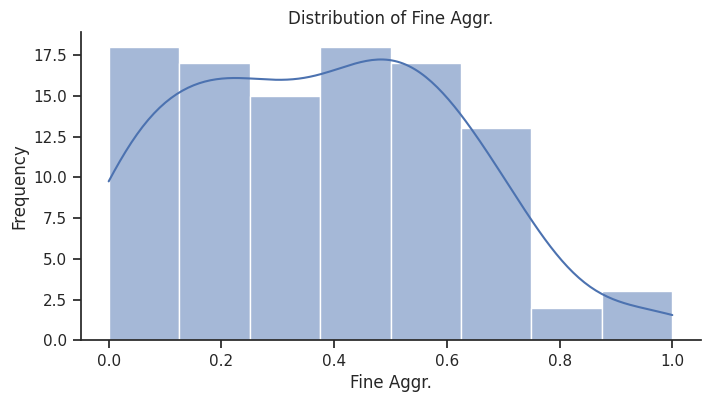

In [ ]:
for column in concrete_transformed.columns:
  sns.set(style = "ticks")
  plt.figure(figsize = (8, 4))
  sns.histplot(data = concrete_transformed[column], kde = True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  sns.despine()
  plt.show()

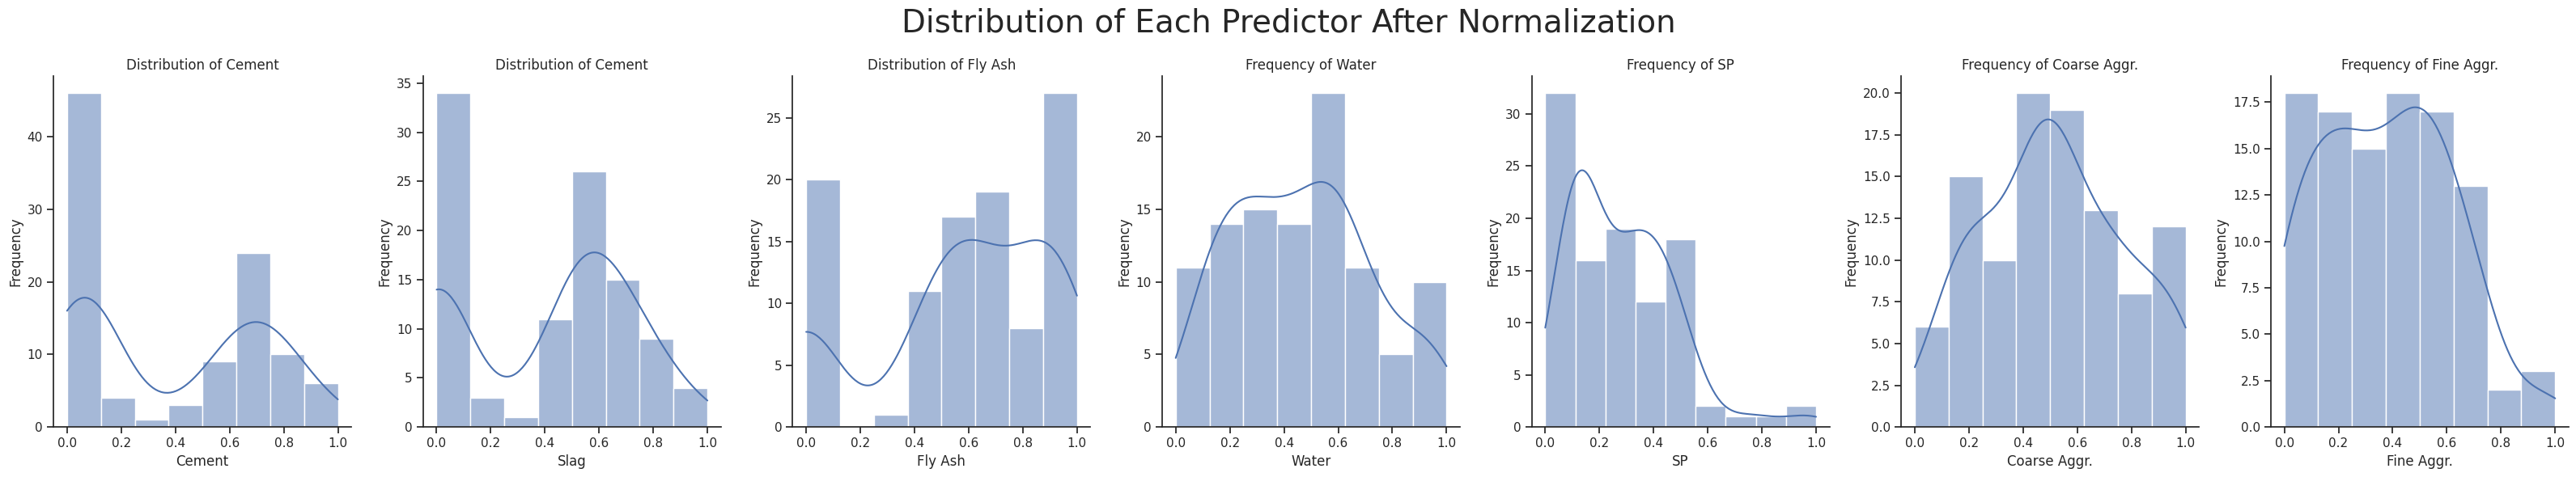

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (32, 6))

fig.suptitle('Distribution of Each Predictor After Normalization', fontsize = 28)

sns.histplot(data = concrete_transformed["Cement"], kde = True, ax = axes[0])
axes[0].set_xlabel('Cement')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Cement')

sns.histplot(data = concrete_transformed["Slag"], kde = True, ax = axes[1])
axes[1].set_xlabel('Slag')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Cement')

sns.histplot(data = concrete_transformed["Fly Ash"], kde = True, ax = axes[2])
axes[2].set_xlabel('Fly Ash')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Fly Ash')

sns.histplot(data = concrete_transformed["Water"], kde = True, ax = axes[3])
axes[3].set_xlabel('Water')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Water')

sns.histplot(data = concrete_transformed["SP"], kde = True, ax = axes[4])
axes[4].set_xlabel('SP')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of SP')

sns.histplot(data = concrete_transformed["Coarse Aggr."], kde = True, ax = axes[5])
axes[5].set_xlabel('Coarse Aggr.')
axes[5].set_ylabel('Frequency')
axes[5].set_title('Frequency of Coarse Aggr.')

sns.histplot(data = concrete_transformed["Fine Aggr."], kde = True, ax = axes[6])
axes[6].set_xlabel('Fine Aggr.')
axes[6].set_ylabel('Frequency')
axes[6].set_title('Frequency of Fine Aggr.')

sns.despine()
plt.tight_layout()

In [ ]:
dataframe = pd.concat([concrete_transformed, concrete_target], axis = 1, join = "inner")

In [ ]:
dataframe.head()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.,Strength
0,0.573840,0.424870,0.403846,0.6250,0.315068,0.573267,0.150727,34.99
1,0.109705,0.772021,0.734615,0.2500,0.520548,0.394852,0.403213,41.14
2,0.105485,0.766839,0.734615,0.2375,0.794521,0.386078,0.391737,41.81
3,0.105485,0.766839,0.730769,0.2375,1.000000,0.380228,0.384086,42.08
4,0.071730,0.580311,0.553846,0.7500,0.383562,0.628839,0.066565,26.82


In [ ]:
dataframe.describe()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.,Strength
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.391959,0.404009,0.573133,0.464600,0.283548,0.514708,0.378748,36.039417
std,0.332815,0.313271,0.328531,0.252602,0.192297,0.258530,0.242319,7.838232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.190000
25%,0.063291,0.000259,0.444231,0.250000,0.109589,0.326119,0.167942,30.900000
50%,0.468354,0.518135,0.630769,0.450000,0.246575,0.500146,0.390589,35.520000
75%,0.704219,0.647668,0.907500,0.618750,0.383562,0.715999,0.563887,41.205000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.530000


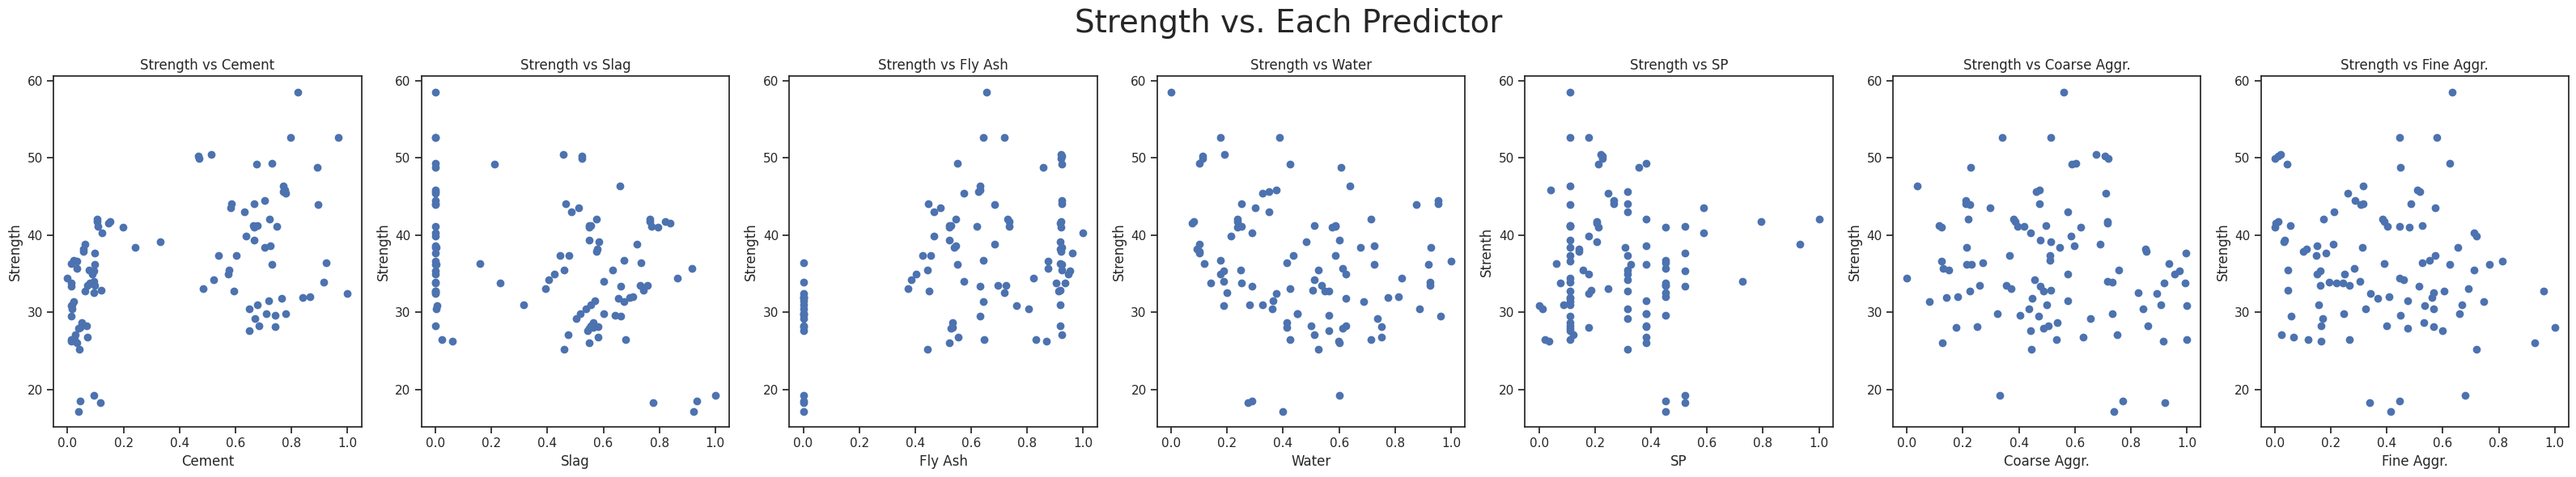

In [ ]:
# Plot scatterplots to see if there's a linear relationship between the target and each predictor
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (32, 6))

fig.suptitle("Strength vs. Each Predictor", fontsize = 28)

axes[0].plot(dataframe['Cement'], dataframe['Strength'], 'o')
axes[0].set_xlabel('Cement')
axes[0].set_ylabel('Strength')
axes[0].set_title('Strength vs Cement')

axes[1].plot(dataframe['Slag'], dataframe['Strength'], 'o')
axes[1].set_xlabel('Slag')
axes[1].set_ylabel('Strength')
axes[1].set_title('Strength vs Slag')

axes[2].plot(dataframe['Fly Ash'], dataframe['Strength'], 'o')
axes[2].set_xlabel('Fly Ash')
axes[2].set_ylabel('Strength')
axes[2].set_title('Strength vs Fly Ash')

axes[3].plot(dataframe['Water'], dataframe['Strength'], 'o')
axes[3].set_xlabel('Water')
axes[3].set_ylabel('Strength')
axes[3].set_title('Strength vs Water')

axes[4].plot(dataframe['SP'], dataframe['Strength'], 'o')
axes[4].set_xlabel('SP')
axes[4].set_ylabel('Strenth')
axes[4].set_title('Strength vs SP')

axes[5].plot(dataframe['Coarse Aggr.'], dataframe['Strength'], 'o')
axes[5].set_xlabel('Coarse Aggr.')
axes[5].set_ylabel('Strength')
axes[5].set_title('Strength vs Coarse Aggr.')

axes[6].plot(dataframe['Fine Aggr.'], dataframe['Strength'], 'o')
axes[6].set_xlabel('Fine Aggr.')
axes[6].set_ylabel('Strength')
axes[6].set_title('Strength vs Fine Aggr.')

plt.tight_layout()

In [ ]:
dataframe.corr()

,Cement,Slag,Fly Ash,Water,SP,Coarse Aggr.,Fine Aggr.,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.331588
Fly Ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.037871
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.160684
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,-0.154484
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,1.000000


In [ ]:
dataframe.corr()["Strength"]

Cement          0.445725
Slag           -0.331588
Fly Ash         0.444393
Water          -0.254235
SP             -0.037871
Coarse Aggr.   -0.160684
Fine Aggr.     -0.154484
Strength        1.000000
Name: Strength, dtype: float64

<Axes: >

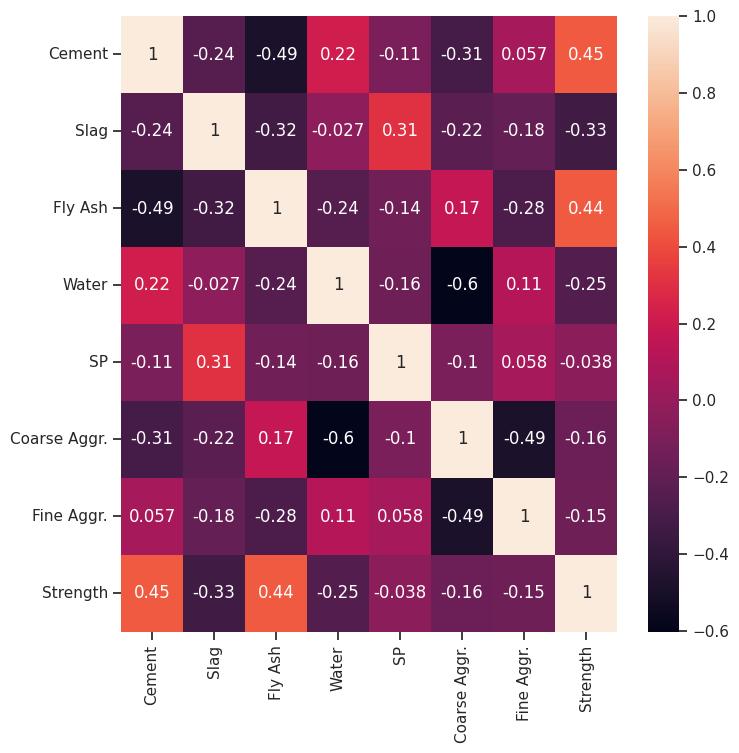

In [ ]:
# Correlation Matrix
plt.figure(figsize = (8, 8))
sns.heatmap(dataframe.corr(), annot = True)

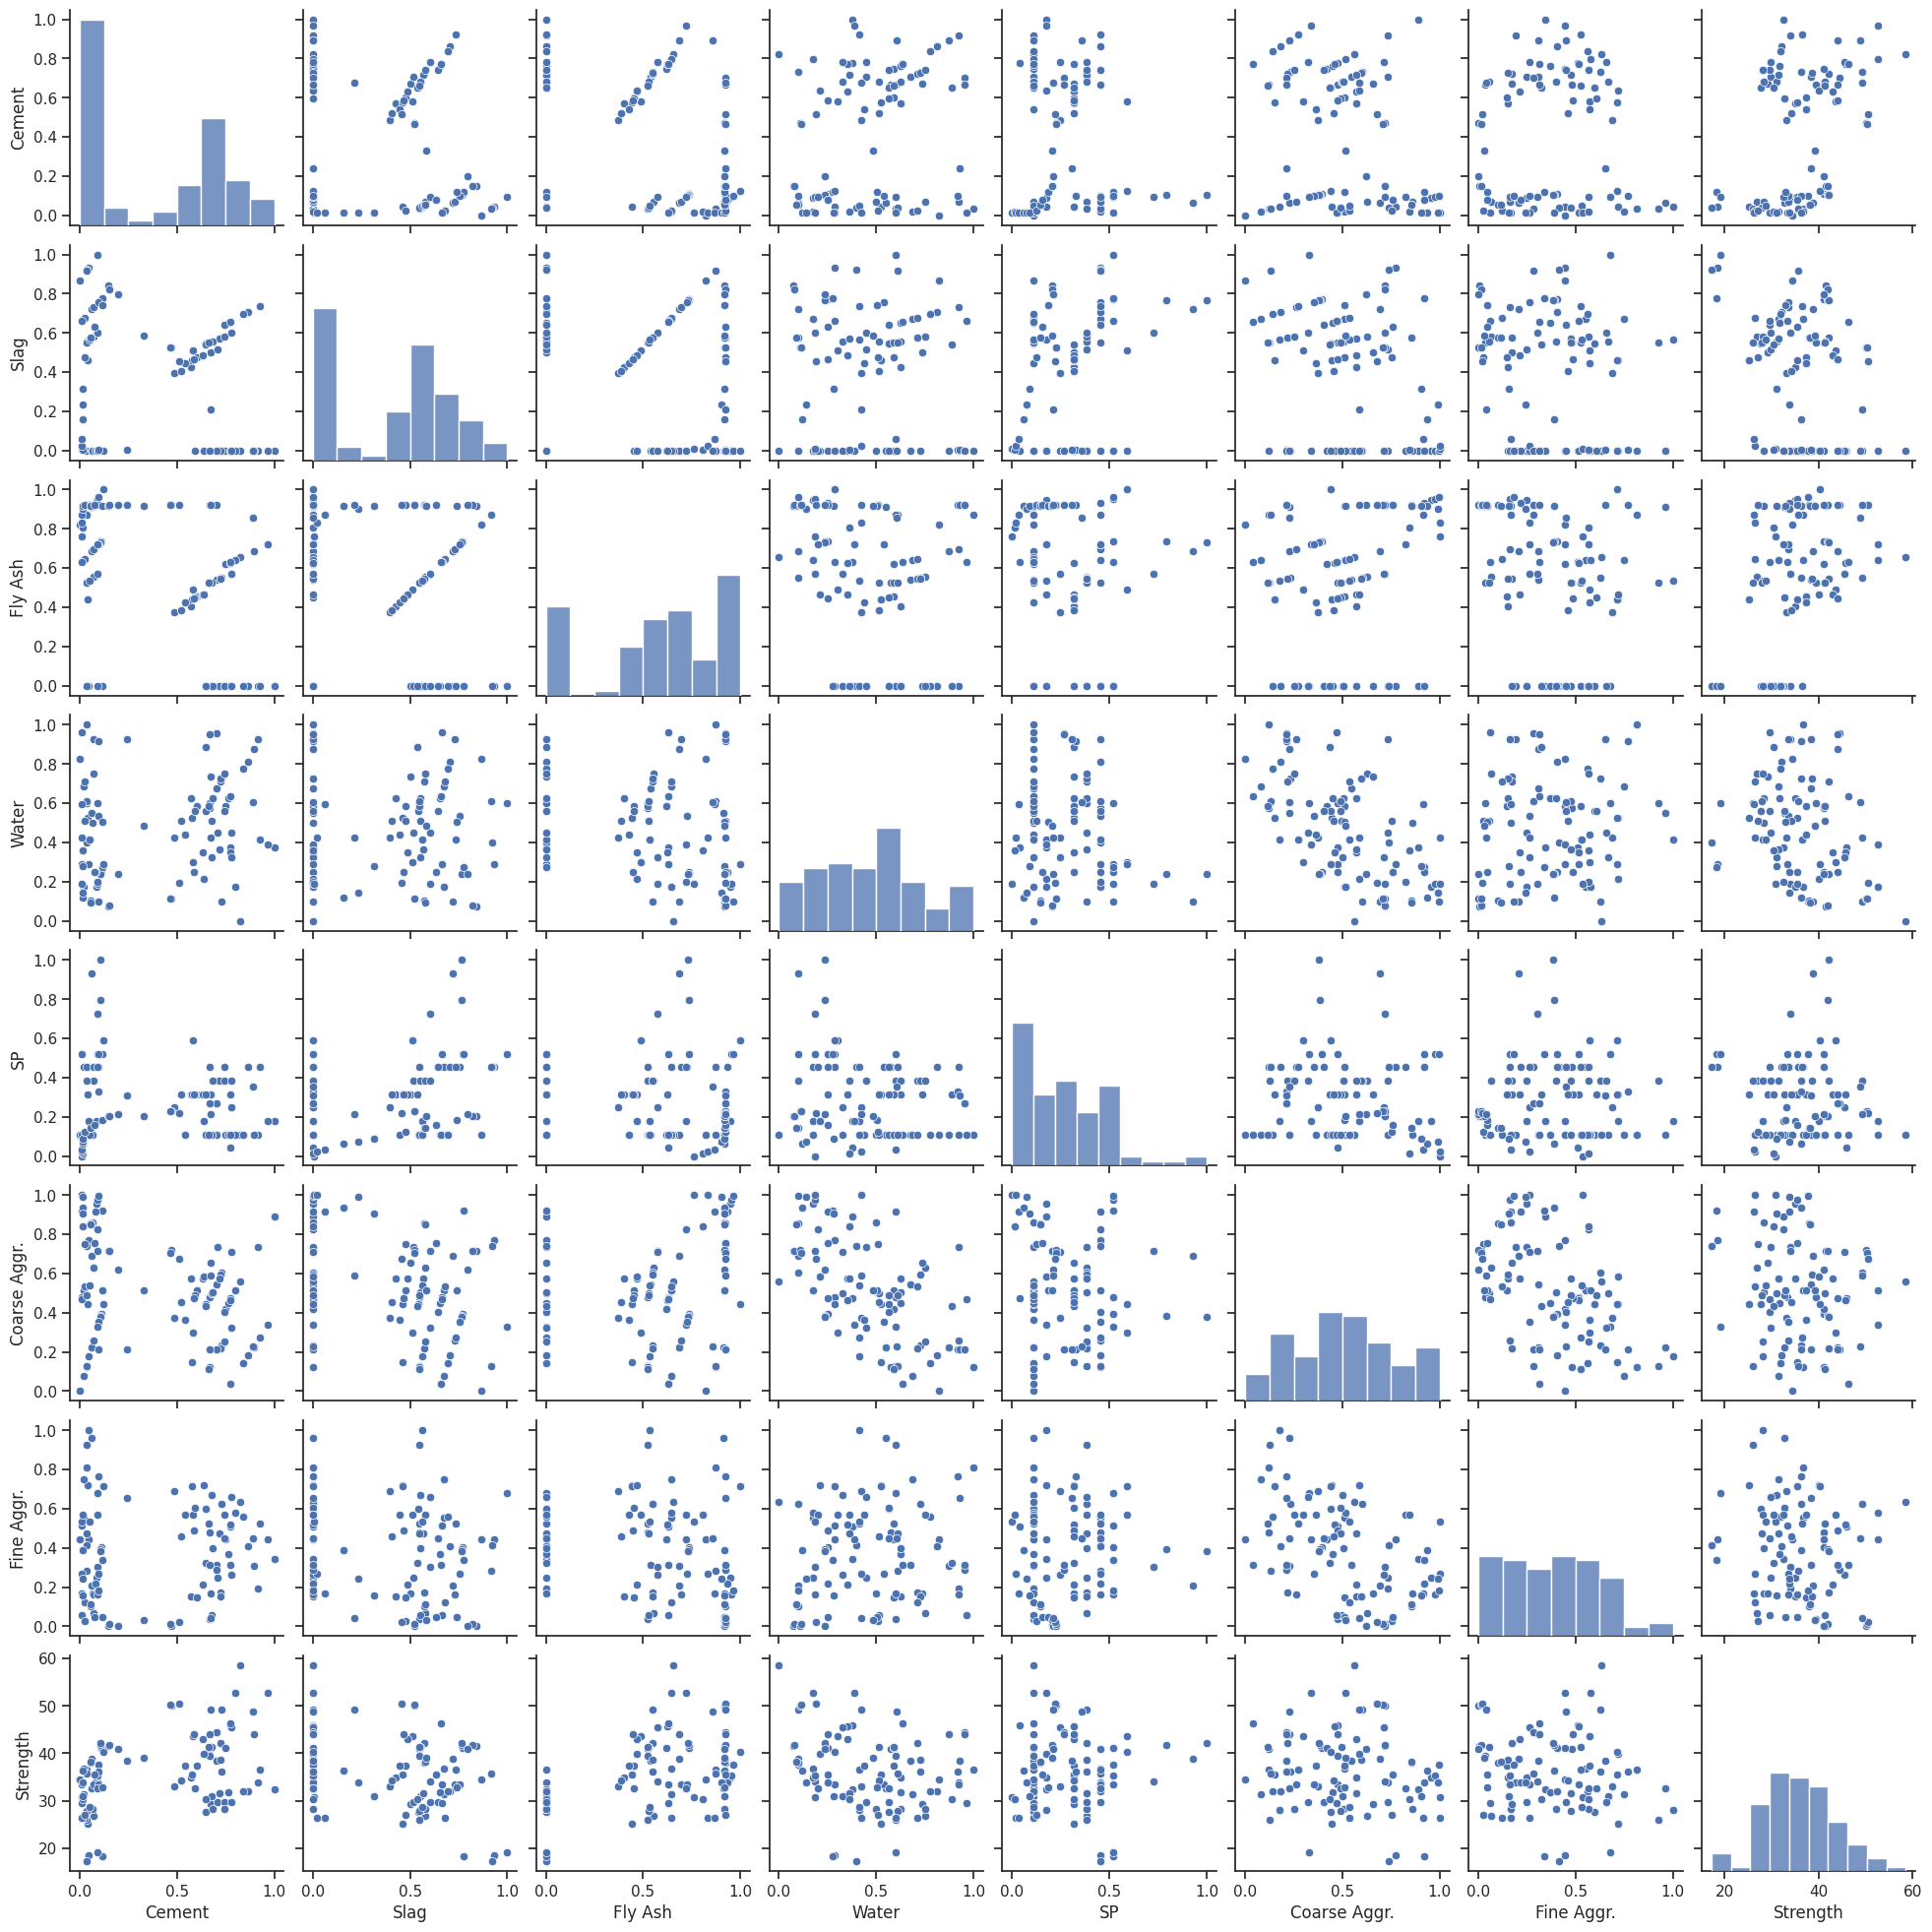

In [ ]:
# Pairplot
sns.pairplot(data = dataframe)

In [ ]:
# Define predictor variables and response variables
X = dataframe[["Cement", "Slag", "Fly Ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."]]
y = dataframe["Strength"]

In [ ]:
# Split data into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

## Models

### OLS Model

In [ ]:
# Add the constant term
X_ols = sm.add_constant(X)

In [ ]:
# Fit the model
ols_model = sm.OLS(y, X_ols)

In [ ]:
# Print a summary of the model
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           5.44e-44
Time:                        23:50:27   Log-Likelihood:                -240.75
No. Observations:                 103   AIC:                             497.5
Df Residuals:                      95   BIC:                             518.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           47.0012     18.615      2.525      0.013      10.045      83.957
Cement          14.5549      5.409      2.691      0.008       3.817      25.293
Slag            -5.7336      6.130     -0.935      0.352     -17.903       6.436
Fly Ash         13.1368      6.021      2.182      0.032       1.183      25.090
Water          -18.6156      5.733     -3.247      0.002     -29.997      -7.235
SP               1.5060      1.965      0.766      0.445      -2.395       5.407
Coarse Aggr.   -19.0170      9.381     -2.027      0.045     -37.642      -0.392
Fine Aggr.     -10.2163      7.534     -1.356      0.178     -25.174       4.741
==============================================================================
Omnibus:                        7.553   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.157
Skew:                           0.555   Prob(JB):                       0.0279
Kurtosis:                       3.658   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS model is:\
y = 47.0012 + 14.5549x<sub>1</sub> - 5.7336x<sub>2</sub> + 13.1368x<sub>3</sub> - 18.6156x<sub>4</sub> + 1.5060x<sub>5</sub> - 19.0170x<sub>6</sub> - 10.2163x<sub>7</sub>\
\
where:\
y: Concrete\
x<sub>1</sub>: Cement<br>
x<sub>2</sub>: Slag<br>
x<sub>3</sub>: Fly Ash<br>
x<sub>4</sub>: Water<br>
x<sub>5</sub>: SP<br>
x<sub>6</sub>: Coarse Aggr.<br>
x<sub>7</sub>: Fine Aggr.<br>

### SGD Model

In [ ]:
# Create instances of the models
# Tuning the learning rate
sgd_model1 = SGDRegressor(alpha = 0.000001, random_state = 101)
sgd_model2 = SGDRegressor(alpha = 0.00001, random_state = 101)
sgd_model3 = SGDRegressor(alpha = 0.0001, learning_rate = "invscaling", random_state = 101)
sgd_model4 = SGDRegressor(alpha = 0.001, random_state = 101)
sgd_model5 = SGDRegressor(alpha = 0.01, random_state = 101)
sgd_model6 = SGDRegressor(alpha = 0.1, random_state = 101)
sgd_model7 = SGDRegressor(alpha = 1, random_state = 101)

# Tuning the type of learning rate
sgd_model8 = SGDRegressor(learning_rate = "constant", random_state = 101)
# sgd_model8 = SGDRegressor(learning_rate = "optimal", random_state = 101) # tried but the r2 is -1.20869535192058e+23
sgd_model9 = SGDRegressor(alpha = 0.000001, learning_rate = "adaptive", random_state = 101)

In [ ]:
# Train (fit) the models on the training set
sgd_model1.fit(X_train, y_train)
sgd_model2.fit(X_train, y_train)
sgd_model3.fit(X_train, y_train)
sgd_model4.fit(X_train, y_train)
sgd_model5.fit(X_train, y_train)
sgd_model6.fit(X_train, y_train)
sgd_model7.fit(X_train, y_train)
sgd_model8.fit(X_train, y_train)
sgd_model9.fit(X_train, y_train)

SGDRegressor(alpha=1e-06, learning_rate='adaptive', random_state=101)

In [ ]:
# Make predictions on the test set
y_predict1 = sgd_model1.predict(X_test)
y_predict2 = sgd_model2.predict(X_test)
y_predict3 = sgd_model3.predict(X_test)
y_predict4 = sgd_model4.predict(X_test)
y_predict5 = sgd_model5.predict(X_test)
y_predict6 = sgd_model6.predict(X_test)
y_predict7 = sgd_model7.predict(X_test)
y_predict8 = sgd_model8.predict(X_test)
y_predict9 = sgd_model9.predict(X_test)

In [ ]:
# Evaluate the models and tabulate the metrics
sgd_metrics = pd.DataFrame({"Hyperparameters": pd.Series(dtype = "object"),
                            "Mean Absolute Error": pd.Series(dtype = "float"),
                            "Mean Squared Error": pd.Series(dtype = "float"),
                            "Root Mean Squared Error": pd.Series(dtype = "float"),
                            "R-Squared": pd.Series(dtype = "float")})

In [ ]:
sgd_metrics["Hyperparameters"] = ["alpha = 0.000001",
                                  "alpha = 0.00001",
                                  "alpha = 0.0001, learning_rate = 'invscaling'",
                                  "alpha = 0.001",
                                  "alpha = 0.01",
                                  "alpha = 0.1",
                                  "alpha = 1",
                                  "learning_rate = 'constant'",
                                  "alpha = 0.000001, learning_rate = 'adaptive'"]

In [ ]:
sgd_metrics["Mean Absolute Error"] = [mean_absolute_error(y_test, y_predict1),
                                      mean_absolute_error(y_test, y_predict2),
                                      mean_absolute_error(y_test, y_predict3),
                                      mean_absolute_error(y_test, y_predict4),
                                      mean_absolute_error(y_test, y_predict5),
                                      mean_absolute_error(y_test, y_predict6),
                                      mean_absolute_error(y_test, y_predict7),
                                      mean_absolute_error(y_test, y_predict8),
                                      mean_absolute_error(y_test, y_predict9)]

In [ ]:
sgd_metrics["Mean Squared Error"] = [mean_squared_error(y_test, y_predict1),
                                     mean_squared_error(y_test, y_predict2),
                                     mean_squared_error(y_test, y_predict3),
                                     mean_squared_error(y_test, y_predict4),
                                     mean_squared_error(y_test, y_predict5),
                                     mean_squared_error(y_test, y_predict6),
                                     mean_squared_error(y_test, y_predict7),
                                     mean_squared_error(y_test, y_predict8),
                                     mean_squared_error(y_test, y_predict9)]

In [ ]:
sgd_metrics["Root Mean Squared Error"] = [sqrt(mean_squared_error(y_test, y_predict1)),
                                          sqrt(mean_squared_error(y_test, y_predict2)),
                                          sqrt(mean_squared_error(y_test, y_predict3)),
                                          sqrt(mean_squared_error(y_test, y_predict4)),
                                          sqrt(mean_squared_error(y_test, y_predict5)),
                                          sqrt(mean_squared_error(y_test, y_predict6)),
                                          sqrt(mean_squared_error(y_test, y_predict7)),
                                          sqrt(mean_squared_error(y_test, y_predict8)),
                                          sqrt(mean_squared_error(y_test, y_predict9))]

In [ ]:
sgd_metrics["R-Squared"] = [r2_score(y_test, y_predict1),
                            r2_score(y_test, y_predict2),
                            r2_score(y_test, y_predict3),
                            r2_score(y_test, y_predict4),
                            r2_score(y_test, y_predict5),
                            r2_score(y_test, y_predict6),
                            r2_score(y_test, y_predict7),
                            r2_score(y_test, y_predict8),
                            r2_score(y_test, y_predict9)]

In [ ]:
sgd_metrics.set_axis(["SGD_Model1", "SGD_Model2", "SGD_Model3", "SGD_Model4", "SGD_Model5",  "SGD_Model6", "SGD_Model7", "SGD_Model8", "SGD_Model9"])

,Hyperparameters,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-Squared
SGD_Model1,alpha = 0.000001,2.596216,9.173776,3.028824,0.852546
SGD_Model2,alpha = 0.00001,2.596294,9.174468,3.028938,0.852535
SGD_Model3,"alpha = 0.0001, learning_rate = 'invscaling'",2.597076,9.181457,3.030092,0.852422
SGD_Model4,alpha = 0.001,2.605461,9.263212,3.043552,0.851108
SGD_Model5,alpha = 0.01,2.692978,10.200876,3.193881,0.836037
SGD_Model6,alpha = 0.1,4.474651,28.768840,5.363659,0.537585
SGD_Model7,alpha = 1,6.194800,55.175199,7.428001,0.113143
SGD_Model8,learning_rate = 'constant',2.421852,8.087410,2.843837,0.870007
SGD_Model9,"alpha = 0.000001, learning_rate = 'adaptive'",2.402809,7.982238,2.825285,0.871698


In [ ]:
coefficient_dataframe = pd.DataFrame(sgd_model9.coef_, concrete_transformed.columns, columns = ["Coefficient"])

In [ ]:
sgd_model9.coef_

array([23.81862724,  3.58694885, 22.80675217, -6.60199476,  3.67091943,
       -1.46426746,  2.59728297])

In [ ]:
sgd_model9.intercept_

array([14.31280921])

In [ ]:
coefficient_dataframe = pd.DataFrame({"Coefficient": pd.Series(dtype = "float")})

In [ ]:
coefficient_dataframe["Coefficient"] = [14.31280921, 23.81862724, 3.58694885, 22.80675217, -6.60199476, 3.67091943, -1.46426746, 2.59728297]

In [ ]:
coefficient_dataframe.set_axis(["Intercept", "Cement", "Slag", "Fly Ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."])

,Coefficient
Intercept,14.312809
Cement,23.818627
Slag,3.586949
Fly Ash,22.806752
Water,-6.601995
SP,3.670919
Coarse Aggr.,-1.464267
Fine Aggr.,2.597283


The SGDRegressor model is:\
y = 14.312809 + 23.818627x<sub>1</sub> + 3.586949x<sub>2</sub> + 22.806752x<sub>3</sub> - 6.601995x<sub>4</sub> + 3.670919x<sub>5</sub> - 1.464267x<sub>6</sub> + 2.597283x<sub>7</sub>\
\
where:\
y: Concrete\
x<sub>1</sub>: Cement<br>
x<sub>2</sub>: Slag<br>
x<sub>3</sub>: Fly Ash<br>
x<sub>4</sub>: Water<br>
x<sub>5</sub>: SP<br>
x<sub>6</sub>: Coarse Aggr.<br>
x<sub>7</sub>: Fine Aggr.<br>